In [1]:
import numpy as np
#Python’s plotting library, Matplotlib.
#we only import pyplot to speed up the code
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline
train_data=np.load('train_data.npy')
train_labels=np.load("train_labels.npy")

print('train data properties')
print(train_data.size)
print(len(train_data))
print(train_data.shape)
#plt.plot(train_data)
#plt.show()

print('train label properties')
print(len(train_labels))
train_labels

train data properties
5880000
7500
(7500, 784)
train label properties
7500


array([9, 2, 8, ..., 3, 4, 2], dtype=uint8)

In [2]:
test_data=np.load('test_data.npy')
test_labels=np.load("test_labels.npy")

print('test data properties')
print(test_data.size)
print(len(test_data))
print(test_data.shape)
#plt.plot(train_data)
#plt.show()

print('train label properties')
print(len(test_labels))
#test_labels

test data properties
784000
1000
(1000, 784)
train label properties
1000


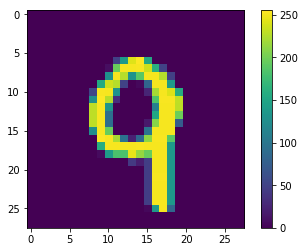

In [3]:
plt.figure()
plt.imshow(train_data[0].reshape((28,28)))
plt.colorbar()
plt.grid(False)
plt.show()

In [4]:
image_size = 28 # width and length

def images(tab ):
    for i in range(len(tab)):
        img = tab[i].reshape((image_size,image_size))
        plt.imshow(img, cmap="Greys")
        plt.show()
    


In [5]:
def images2(tab ):
    img=[]
    for i in range(len(tab)):
        img.append(  tab[i].reshape((image_size,image_size)))
    return img

In [6]:
train_images=[]
train_images=images2(train_data)


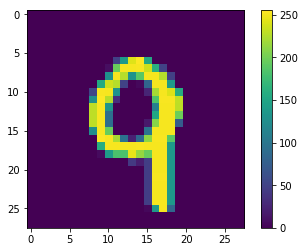

In [7]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

after inspecting the first image in the training set,we found out that the pixel values fall in the range of 0 to 255
for this reason,the data must be preprocessed before training the network

We scale these values to a range of 0 to 1 before feeding to the neural network model. 
For this, we divide the values by 255. the training set and the testing set must be preprocessed in the same way


In [8]:
train_data2 = train_data / 255.0

In [9]:
train_data2

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [10]:
train_images2=[]
train_images2=images2(train_data2)

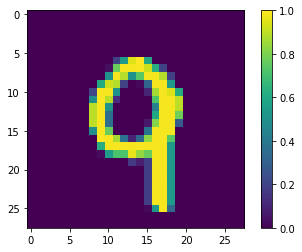

In [11]:
plt.figure()
plt.imshow(train_images2[0])
plt.colorbar()
plt.grid(False)
plt.show()

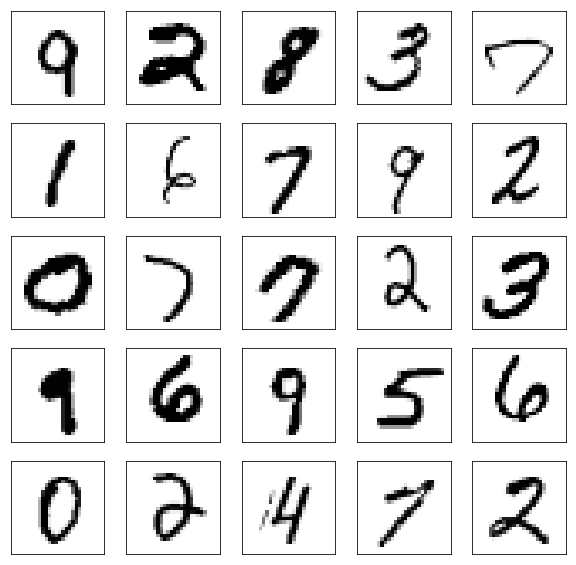

In [12]:
class_names = ['zero', 'one', 'two', 'three', 'four', 
               'five', 'Six', 'Seven', 'eight', 'nine']
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images2[i], cmap="Greys")
    #plt.xlabel(class_names[train_labels[i]])
plt.show()

In [13]:
#function that returns the distance between two vectors passed in arguments
def distance(x,y):
    return (np.sum(np.square(x-y)))


In [14]:

def euclidean_distance(point1,point2,k):
    euc_dist=np.sqrt(np.sum(np.square(point1-point2),axis=1))
    return np.argsort(euc_dist)[0:k]

euclidean_distance(train_images2[600],train_images2[15],6)


array([ 0, 26,  4, 27,  2,  3], dtype=int64)

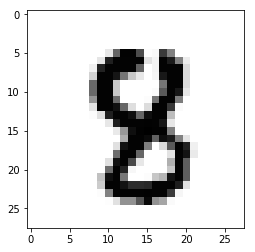

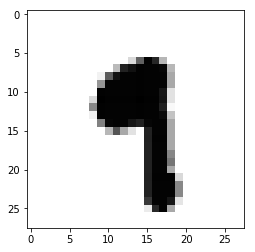

In [15]:
plt.imshow(train_images2[600], cmap="Greys")
plt.show()
plt.imshow(train_images2[15], cmap="Greys")

#plt.xlabel(class_names[train_labels[i]])
plt.show()

In [16]:
  euclidean_distance(train_images2,train_images2[15],6)

array([[ 0, 25, 24, 23, 22, 21, 20, 26, 27,  1,  2,  7,  3,  4,  6,  5,
        17, 16,  8,  9, 19, 10, 18, 11, 14, 12, 15, 13],
       [ 0, 25, 24, 26, 27,  1,  2,  3, 23,  4,  5,  6, 22, 18, 13,  7,
        14, 11, 12, 21, 15,  8, 10, 19, 17, 20, 16,  9],
       [ 0, 25, 24, 26,  5, 27,  1,  2,  3,  4, 23,  6, 22, 21, 20,  7,
        14, 15, 12, 13, 19,  8, 18, 11, 16, 17, 10,  9],
       [ 0, 25, 24, 23, 22, 26, 27,  1,  2, 21,  3,  7,  6,  8,  5,  4,
        20, 13, 19, 14, 12,  9, 10, 11, 17, 15, 18, 16],
       [ 0, 25, 24, 26, 27,  3,  2,  1,  8,  7, 21, 20, 23,  6, 22, 19,
         4,  9,  5, 10, 18, 11, 12, 13, 14, 15, 17, 16],
       [ 0, 25, 24, 23, 22, 21, 20, 26, 27,  1,  2,  7,  3,  4,  6,  5,
         8, 19, 14,  9, 15, 10, 18, 13, 16, 12, 11, 17]], dtype=int64)

In [17]:
def predict(train_images2 ,k):
    img_label=[]
    distances=[]
    for img in train_images2:
        distances=euclidean_distance(train_images2,img,k)
        results=[]
        for i in distances:
            results.append(train_images2[i])
        # Find the most common distance value occurence in results
        label=(Counter(results).most_common(1))
        #Counter(results) returns a pair of (key,value)
        img_label.append(img,label[0][0])
    return img_label


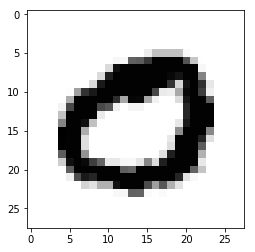

In [18]:
#results=predict(train_images2,10)
plt.imshow(train_images2[10], cmap="Greys")
#plt.xlabel(class_names[train_labels[i]])
plt.show()

In [19]:
acc=[]
for k in range(1,10):
    results=predict(train_images2,k)
    predictions=[]
    for result in results:
        prediction.append(result[1])
    acc.append([get_accuracy(predictions),k])
plotx=[]
ploty=[]
for a in acc:
    plotx.append(a[1])
    ploty.append(a[0])
plt.plot(plotx,ploty)
plt.xlabel("k values")
plt.ylabel("accuracy")
plt.show()

TypeError: only integer scalar arrays can be converted to a scalar index